<a href="https://colab.research.google.com/github/leeolney/data_portfolio/blob/main/job_changes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data**: 

[HR Analytics: Job Change of Data scientist](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists) by Mobius.

**Features**: 

* enrollee_id : Unique ID for enrollee
* city: City code
* citydevelopmentindex: Developement index of the city (scaled)
* gender: Gender of enrolee
* relevent_experience: Relevent experience of enrolee
* enrolled_university: Type of University course enrolled if any
* education_level: Education level of enrolee
* major_discipline :Education major discipline of enrolee
* experience: Enrolee total experience in years
* company_size: No of employees in current employer's company
* company_type : Type of current employer
* lastnewjob: Difference in years between previous job and current job
* training_hours: training hours completed
* target: 0 – Not looking for job change, 1 – Looking for a job change


**Exercise objectives**: 

Predict who will move to a new job

**Reference notebooks**: 

[XGBoost Prediction - EDA and PivotTableJS](https://www.kaggle.com/cemhansenol98/xgboost-prediction-eda-and-pivottablejs#Inspiration) by Cemhan Senol

[Predict who will move to a new job](https://www.kaggle.com/khotijahs1/predict-who-will-move-to-a-new-job#Target) by Siti Khotijah





### Google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import libraries

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

## Import data

In [3]:
path1 = "/content/drive/MyDrive/data/aug_train.csv"
path2 = "/content/drive/MyDrive/data/aug_test.csv"
data = pd.read_csv(path1)
data_train = pd.read_csv(path2)

In [4]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [5]:
data.shape

(19158, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [7]:
data.isna().sum()*100/len(data)

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.000000
target                     0.000000
dtype: float64

In [8]:
data['target'] = data['target'].astype(np.int64)

## Data cleaning

### city

In [9]:
#city 
data.city = data.city.apply(lambda x: int(x.split('_')[1]))

### gender

In [10]:
data.gender.isna().sum()

4508

In [11]:
data.gender.value_counts()


Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

In [12]:
data.gender = data.gender.fillna('Male')

### enrolled_university

In [13]:
data.enrolled_university.isna().sum()

386

In [14]:
data.enrolled_university.value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [15]:
data.enrolled_university = data.enrolled_university.fillna('no_enrollment')

### education_level

In [16]:
data.education_level.isna().sum()

460

In [17]:
data.education_level.value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [18]:
data.education_level = data.education_level.fillna(method='ffill')

### major_discipline

In [19]:
data.major_discipline.isna().sum()

2813

In [20]:
data.major_discipline.value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [21]:
data.major_discipline = data.major_discipline.fillna('STEM')

### experience

In [22]:
data.experience.isna().sum()

65

In [23]:
data.experience.value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [24]:
data.experience = data.experience.fillna(method='ffill')

### company_size

In [25]:
data.company_size.isna().sum()

5938

In [26]:
data.company_size.value_counts()

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [27]:
data.company_size = data.company_size.fillna(method = 'ffill')

In [28]:
data.iloc[0,9] = '50-99'

### company_type

In [29]:
data.company_type.unique()

array([nan, 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other',
       'Public Sector', 'NGO'], dtype=object)

In [30]:
data.company_type.value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

In [31]:
data.company_type = data.company_type.fillna('Pvt Ltd')

### last_new_job

In [32]:
data.last_new_job.unique()

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

In [33]:
data.last_new_job.value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [34]:
data.last_new_job = data.last_new_job.fillna(method = 'bfill')

## EDA

### Summary

In [ ]:
data.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


[]

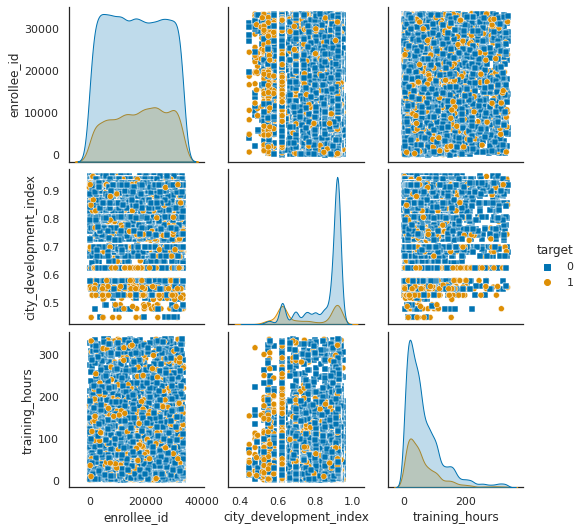

In [ ]:
sns.pairplot(data, hue='target', markers = ['s', 'o'])
plt.plot()

### Correlation plot

<Figure size 720x576 with 0 Axes>

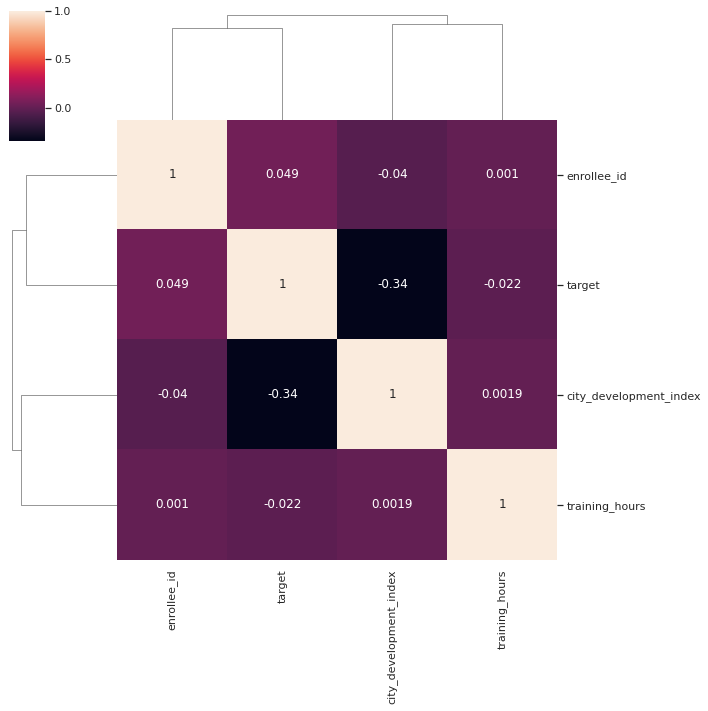

In [ ]:
plt.figure(figsize=(10,8))
sns.clustermap(data.corr(),annot = True)
plt.show()

### target

Text(0.5, 1.0, 'Target')

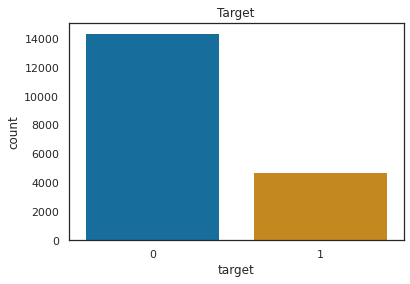

In [ ]:
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('colorblind')
ax = sns.countplot(x="target",data=data)
plt.title('Target')

### gender

In [ ]:
data.gender.value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

In [ ]:
pd.crosstab(data.target,data.gender,normalize='index')

gender,Female,Male,Other
target,,,
0,0.080980,0.90650,0.012520
1,0.096222,0.88902,0.014758


### relevent_experience

Text(0, 0.5, 'count')

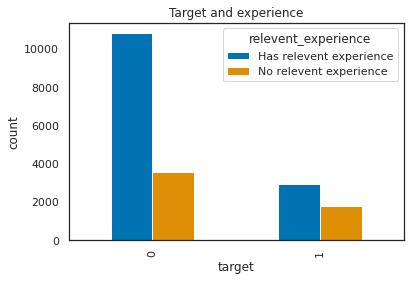

In [ ]:
pd.crosstab(data.target,data.relevent_experience).plot(kind='bar')
plt.title('Target and experience')
plt.ylabel('count')

### enrolled_university

Text(0.5, 1.0, 'Enrolled_university and target')

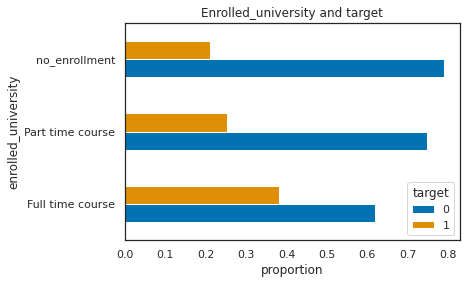

In [ ]:
pd.crosstab(data.enrolled_university,data.target,normalize="index").plot(kind='barh')
plt.xlabel('proportion')
plt.title('Enrolled_university and target')

### education_level

In [ ]:
#value count
data.education_level.value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [ ]:
#proportion
pd.crosstab(data.target,data.education_level, normalize='index')

education_level,Graduate,High School,Masters,Phd,Primary School
target,,,,,
0,0.595579,0.115722,0.244278,0.025383,0.019037
1,0.694415,0.084314,0.200086,0.012412,0.008774


### major_discipline

In [ ]:
#value count
data.major_discipline.value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [ ]:
#proportion
pd.crosstab(data.target,data.major_discipline, normalize='index')

major_discipline,Arts,Business Degree,Humanities,No Major,Other,STEM
target,,,,,,
0,0.016506,0.019889,0.043575,0.013865,0.023026,0.883139
1,0.012535,0.020341,0.033349,0.013009,0.024125,0.896641


### experience

In [ ]:
#proportion
pd.crosstab(data.target,data.experience,normalize='index')

experience,1,10,11,12,13,14,15,16,17,18,19,2,20,3,4,5,6,7,8,9,<1,>20
target,,,,,,,,,,,,,,,,,,,,,,
0,0.022038,0.054258,0.035777,0.028035,0.022456,0.033405,0.039891,0.030407,0.019876,0.016528,0.017505,0.052514,0.008020,0.061092,0.065974,0.070995,0.060883,0.050561,0.042332,0.053490,0.019876,0.194086
1,0.049011,0.043542,0.031763,0.019352,0.016197,0.022507,0.023980,0.015145,0.011990,0.009045,0.011149,0.078671,0.006942,0.100547,0.096130,0.086664,0.072150,0.063736,0.041018,0.044804,0.049853,0.105806


### company_size

Text(0, 0.5, 'count')

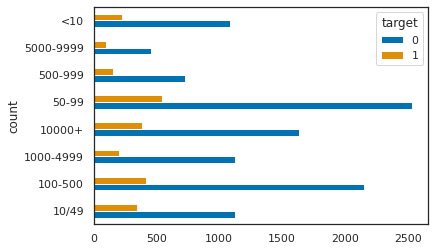

In [ ]:
pd.crosstab(data.company_size,data.target).plot(kind='barh')
plt.ylabel('count')

### company_type

Text(0.5, 0, 'proportion')

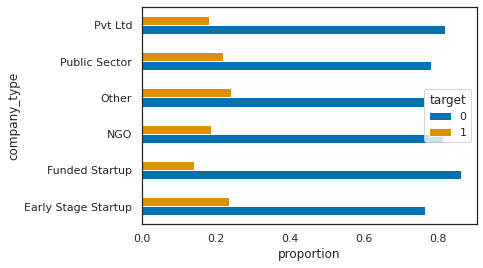

In [ ]:
#proportion
pd.crosstab(data.company_type,data.target,normalize='index').plot(kind='barh')
plt.xlabel('proportion')

### last_new_job

Text(0.5, 0, 'proportion')

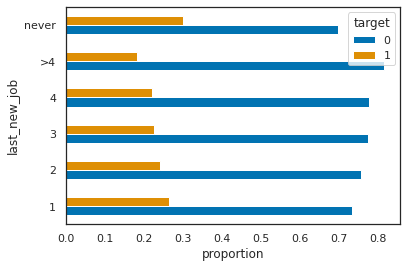

In [ ]:
#proportion
pd.crosstab(data.last_new_job,data.target,normalize='index').plot(kind='barh')
plt.xlabel('proportion')

## Feature transformation

In [35]:
numeric_columns = list(data.select_dtypes(exclude=['object']).dtypes.index)
print(numeric_columns)

['enrollee_id', 'city', 'city_development_index', 'training_hours', 'target']


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'skew: 1.8190947994281477')

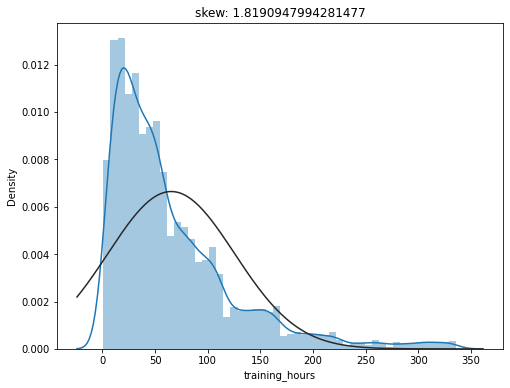

In [36]:
from scipy.stats import norm, skew
plt.figure(figsize=(8,6))
sns.distplot(data['training_hours'],fit=norm)
plt.title('skew: {}'.format(skew(data['training_hours'])))

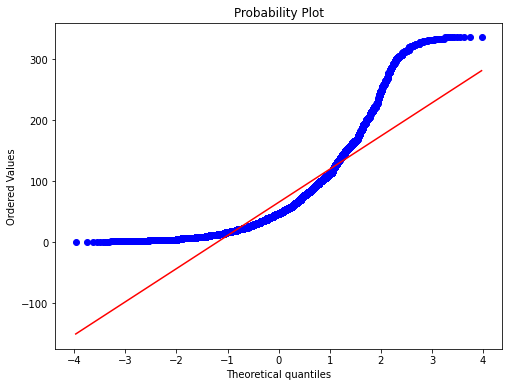

In [37]:
from scipy import stats
plt.figure(figsize = (8,6))
stats.probplot(data['training_hours'], plot = plt)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


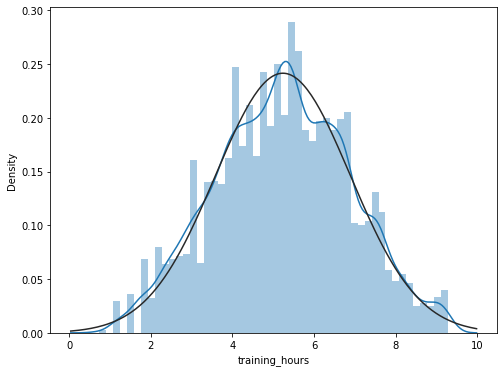

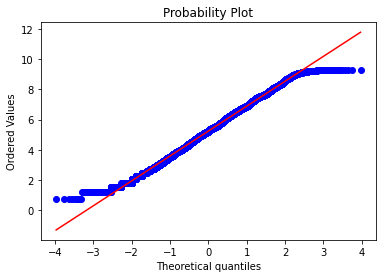

skew: -0.0006093163913336347


In [38]:
# box-cox transform lambda = 0.15 efficently
from scipy.special import boxcox1p
data['training_hours'] = boxcox1p(data['training_hours'], 0.15)
plt.figure(figsize=(8,6))
sns.distplot(data['training_hours'], fit = norm)
plt.show()
stats.probplot(data['training_hours'], plot = plt)
plt.show()
print('skew: {}'.format(skew(data['training_hours'])))

In [39]:
import plotly.express as px
fig = px.box(data, y="training_hours")
fig.show()

## Encoding

In [40]:
df_uniques = pd.DataFrame([[i, len(data[i].unique())] for i in data.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
df_uniques

,Unique Values
Variable,
enrollee_id,19158
city,123
city_development_index,93
gender,3
relevent_experience,2
enrolled_university,3
education_level,5
major_discipline,6
experience,22


In [41]:
binary_variables = list(df_uniques[df_uniques['Unique Values'] == 2].index)
binary_variables

['relevent_experience', 'target']

In [42]:
ordinal_variables= ['education_level','experience','company_size','last_new_job',]

In [43]:
norminal_variables = ['gender', 'relevent_experience','enrolled_university','major_discipline','company_type']

In [44]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder
lb, le = LabelBinarizer(), LabelEncoder() 
for column in binary_variables:
    data[column] = lb.fit_transform(data[column])

In [45]:
data = pd.get_dummies(data, columns = norminal_variables, drop_first=True)
data.describe()

,enrollee_id,city,city_development_index,training_hours,target,gender_Male,gender_Other,relevent_experience_1,enrolled_university_Part time course,enrolled_university_no_enrollment,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
count,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,80.128876,0.828848,5.239149,0.249348,0.925410,0.009970,0.280092,0.062533,0.741361,0.017069,0.034920,0.011640,0.019887,0.903278,0.052250,0.027195,0.006316,0.049849,0.832916
std,9616.292592,46.413570,0.123362,1.651798,0.432647,0.262736,0.099352,0.449056,0.242127,0.437898,0.129530,0.183582,0.107262,0.139617,0.295587,0.222536,0.162655,0.079223,0.217638,0.373061
min,1.000000,1.000000,0.448000,0.730463,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8554.250000,21.000000,0.740000,4.071754,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,16982.500000,101.000000,0.903000,5.248357,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,25169.750000,104.000000,0.920000,6.404587,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,33380.000000,180.000000,0.949000,9.294081,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
ordinal_education_level = {'Primary School':0, 'High School':1, 'Graduate':2, 'Masters':3, 'Phd':4}
data.education_level = data.education_level.map(ordinal_education_level)

ordinal_experience = {'<1':0, '1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9, '10':10,
                      '11':11, '12':12, '13':13, '14':14, '15':15, '16':16, '17':17, '18':18, '19':19, '20':20, '>20':21}
data.experience = data.experience.map(ordinal_experience)

ordinal_company_size = {'<10':0, '10/49':1, '50-99':2, '100-500':3, '500-999':4, '1000-4999':5, '5000-9999':6, '10000+':7}
data.company_size = data.company_size.map(ordinal_company_size)

ordinal_last_new_job = {'never':0, '1':1, '2':2, '3':3, '4':4, '>4':5}
data.last_new_job = data.last_new_job.map(ordinal_last_new_job)

data.describe()

,enrollee_id,city,city_development_index,education_level,experience,company_size,last_new_job,training_hours,target,gender_Male,gender_Other,relevent_experience_1,enrolled_university_Part time course,enrolled_university_no_enrollment,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
count,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,80.128876,0.828848,2.136444,10.096148,3.256707,1.999321,5.239149,0.249348,0.925410,0.009970,0.280092,0.062533,0.741361,0.017069,0.034920,0.011640,0.019887,0.903278,0.052250,0.027195,0.006316,0.049849,0.832916
std,9616.292592,46.413570,0.123362,0.689950,6.776204,2.180740,1.674651,1.651798,0.432647,0.262736,0.099352,0.449056,0.242127,0.437898,0.129530,0.183582,0.107262,0.139617,0.295587,0.222536,0.162655,0.079223,0.217638,0.373061
min,1.000000,1.000000,0.448000,0.000000,0.000000,0.000000,0.000000,0.730463,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8554.250000,21.000000,0.740000,2.000000,4.000000,2.000000,1.000000,4.071754,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,16982.500000,101.000000,0.903000,2.000000,9.000000,3.000000,1.000000,5.248357,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,25169.750000,104.000000,0.920000,3.000000,16.000000,5.000000,3.000000,6.404587,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,33380.000000,180.000000,0.949000,4.000000,21.000000,7.000000,5.000000,9.294081,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   enrollee_id                           19158 non-null  int64  
 1   city                                  19158 non-null  int64  
 2   city_development_index                19158 non-null  float64
 3   education_level                       19158 non-null  int64  
 4   experience                            19158 non-null  int64  
 5   company_size                          19158 non-null  int64  
 6   last_new_job                          19158 non-null  int64  
 7   training_hours                        19158 non-null  float64
 8   target                                19158 non-null  int64  
 9   gender_Male                           19158 non-null  uint8  
 10  gender_Other                          19158 non-null  uint8  
 11  relevent_experi

## Partition

In [48]:
features_cols = data.columns.difference(['target','enrollee_id'])
features_cols 

Index(['city', 'city_development_index', 'company_size',
       'company_type_Funded Startup', 'company_type_NGO', 'company_type_Other',
       'company_type_Public Sector', 'company_type_Pvt Ltd', 'education_level',
       'enrolled_university_Part time course',
       'enrolled_university_no_enrollment', 'experience', 'gender_Male',
       'gender_Other', 'last_new_job', 'major_discipline_Business Degree',
       'major_discipline_Humanities', 'major_discipline_No Major',
       'major_discipline_Other', 'major_discipline_STEM',
       'relevent_experience_1', 'training_hours'],
      dtype='object')

In [49]:
feature_cols= ['city', 'city_development_index', 'company_size',
       'company_type_Funded Startup', 'company_type_NGO', 'company_type_Other',
       'company_type_Public Sector', 'company_type_Pvt Ltd', 'education_level',
       'enrolled_university_Part time course',
       'enrolled_university_no_enrollment', 'experience', 'gender_Male',
       'gender_Other', 'last_new_job', 'major_discipline_Business Degree',
       'major_discipline_Humanities', 'major_discipline_No Major',
       'major_discipline_Other', 'major_discipline_STEM',
       'relevent_experience_1', 'training_hours']

In [50]:
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.target))


In [51]:
#create dataframes
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'target']

X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, 'target']

In [52]:
y_train.value_counts(normalize=True)

0    0.750634
1    0.249366
Name: target, dtype: float64

In [53]:
y_test.value_counts(normalize=True)

0    0.750696
1    0.249304
Name: target, dtype: float64

In [54]:
#scale
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model

### Base model

In [55]:
!pip install catboost
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

     |████████████████████████████████| 66.3MB 54kB/s 


In [56]:
models = []
models.append(('Naive Bayes', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 42)))
models.append(('Random Forest', RandomForestClassifier(random_state = 42)))
models.append(('Extra Trees', ExtraTreesClassifier(random_state = 42)))
models.append(('SVM', SVC(gamma='auto', random_state = 42)))
models.append(('XGBoost', GradientBoostingClassifier(random_state = 42)))
models.append(("CatBoost", CatBoostClassifier(random_state = 42, verbose = False)))
models.append(('GradientBoosting', GradientBoostingClassifier(random_state = 42)))

# evaluate each model in turn
results = []
names = []

In [57]:
for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print("{} : {}".format(name,accuracy))

Naive Bayes : 0.7162491301322199
KNN : 0.7458246346555324
CART : 0.6887613082811412
Random Forest : 0.767223382045929
Extra Trees : 0.7533054975643703
SVM : 0.7506958942240779
XGBoost : 0.7800974251913709
CatBoost : 0.7769659011830202
GradientBoosting : 0.7800974251913709


In [58]:
lgb = lgb.LGBMClassifier(n_estimator=100, silent=False)
lgb.fit(X_train,y_train)
y_pred = lgb.predict(X_test)
print("LGBM Classifier Accuracy Score : {}".format(accuracy_score(y_test, y_pred)))

LGBM Classifier Accuracy Score : 0.7754001391788448


* In terms of accuracy, the XGBoost and gradient boosting models outperformed Naive Bayes, K-nearest neighbours, regression tree, random forest, extra trees and  support actor machine. 

### Hyperparameter tuning

#### XGBoost

In [75]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [76]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic', nthread=1)

In [77]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=42)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:   47.3s finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7fb90ad86eb8>,
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.02, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=600,
                                           n_jobs=1, nthread=1,
                                           objective='binary:logist...
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprec

In [78]:
print(random_search.best_params_)

{'subsample': 0.6, 'min_child_weight': 10, 'max_depth': 3, 'gamma': 1, 'colsample_bytree': 0.6}


In [79]:
model = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic', nthread=1, subsample=0.6,
                     min_child_weight=10, max_depth=3, gamma=1, colsample_bytree=0.6)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      4315
           1       0.58      0.41      0.48      1433

    accuracy                           0.78      5748
   macro avg       0.70      0.66      0.67      5748
weighted avg       0.76      0.78      0.77      5748



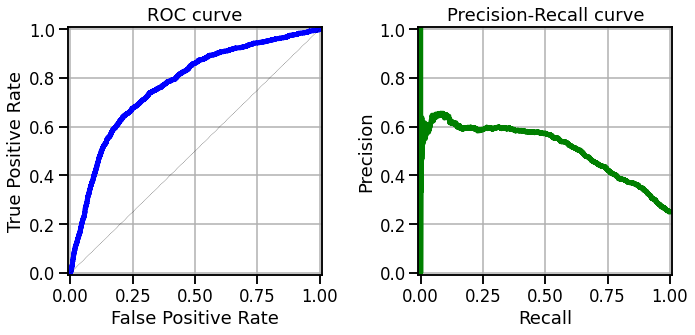

In [80]:
#Plot ROC-AUC and precision-recall curves
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix

sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(10, 5)

# Get the probabilities for each of the two categories
y_prob = model.predict_proba(X_test)

# Plot the ROC-AUC curve
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
ax.plot(fpr, tpr, color='b', linewidth=5)
ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

# Plot the precision-recall curve
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_prob[:,1])
ax.plot(recall, precision, color='g', linewidth=5)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

In [81]:
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
auc = roc_auc_score(y_test, y_prob[:,1])
auc

0.7711698832114072

In [65]:
#feature importance
importances = model.feature_importances_
features = features_cols 
imp = pd.DataFrame({'Features': features, 'Importance': importances})
imp['Sum Importance'] = imp['Importance'].cumsum()
imp = imp.sort_values(by = 'Importance')
imp

,Features,Importance,Sum Importance
5,company_type_Other,0.000000,0.393926
17,major_discipline_No Major,0.017359,0.822754
18,major_discipline_Other,0.020557,0.843311
13,gender_Other,0.021518,0.727997
16,major_discipline_Humanities,0.021716,0.805395
19,major_discipline_STEM,0.022948,0.866259
12,gender_Male,0.023499,0.706478
2,company_size,0.024044,0.325801
6,company_type_Public Sector,0.024398,0.418324
4,company_type_NGO,0.025050,0.393926


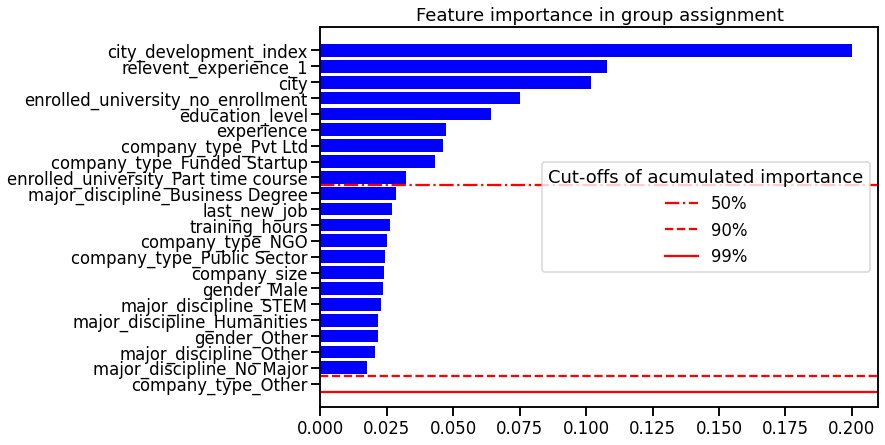

In [66]:
plt.rcParams["figure.figsize"] = (10,7)
plt.barh(imp['Features'], imp['Importance'], color = 'b')
l1 = plt.axhline(len(imp) - (len(imp['Features'][imp['Sum Importance'] < 0.50]) + 1.5), linestyle='-.', color = 'r')
l2 = plt.axhline(len(imp) - (len(imp['Features'][imp['Sum Importance'] < 0.90]) + 1.5), linestyle='--', color = 'r')
l3 = plt.axhline(len(imp) - (len(imp['Features'][imp['Sum Importance'] < 0.99]) + 1.5), linestyle='-', color = 'r')
plt.legend(title = 'Cut-offs of acumulated importance', handles=(l1, l2, l3), labels = ('50%', '90%', '99%'))
plt.title('Feature importance in group assignment')
plt.show()


### Gradient boosting

In [82]:
# Using grid search with cross validation 
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [15, 25, 50, 100, 200, 400],
              'learning_rate': [0.1, 0.01, 0.001, 0.0001],
              'subsample': [1.0, 0.5],
              'max_features': [1, 2, 3, 4]}

GV_GBC = GridSearchCV(GradientBoostingClassifier(random_state=42), 
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

GV_GBC = GV_GBC.fit(X_train, y_train)

In [83]:
# Get the best model
GV_GBC.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=4, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [84]:
y_pred = GV_GBC.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      4315
           1       0.59      0.38      0.46      1433

    accuracy                           0.78      5748
   macro avg       0.70      0.65      0.66      5748
weighted avg       0.76      0.78      0.76      5748



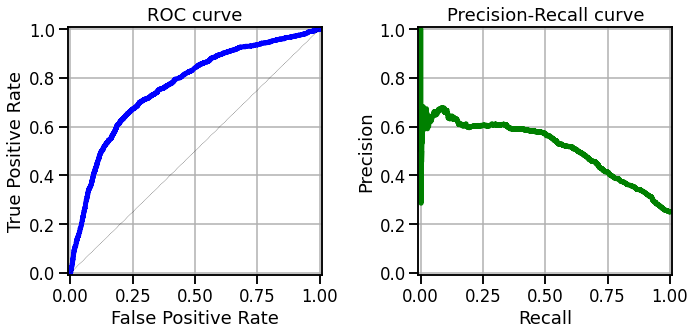

In [85]:
#Plot ROC-AUC and precision-recall curves
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix

sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(10, 5)

# Get the probabilities for each of the two categories
y_prob = GV_GBC.predict_proba(X_test)

# Plot the ROC-AUC curve
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
ax.plot(fpr, tpr, color='b', linewidth=5)
ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

# Plot the precision-recall curve
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_prob[:,1])
ax.plot(recall, precision, color='g', linewidth=5)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

In [86]:
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
auc = roc_auc_score(y_test, y_prob[:,1])
auc

0.7652660067810644

* The XGBoost and Gradient Boosting tuned models have similar F1 score,  precision, recall and AUC scores. 
  + XGBoost model recall of class 1 is 0.02 higher than the Gradient Boosting model
* The XGBoost model suggests that the city development index, relevent experience, city, enrolled university , education level, experience and company type are important variables for predicting candidates looking for a job change.  
